In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import seaborn as sns

In [ ]:
#IMPORTING DATA
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)
df=df[df['Class'].isin(['0','1'])]
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,NaN,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#unique values for all columns
for col in df.columns:
    print("column:{}\nno of unique:{}\n".format(col,len(df[col].unique())))

column:V1
no of unique:275643

column:V2
no of unique:275653

column:V3
no of unique:275655

column:V4
no of unique:275650

column:V5
no of unique:275650

column:V6
no of unique:275632

column:V7
no of unique:275647

column:V8
no of unique:275643

column:V9
no of unique:275639

column:V10
no of unique:275644

column:V11
no of unique:275647

column:V12
no of unique:275648

column:V13
no of unique:275655

column:V14
no of unique:275652

column:V15
no of unique:275639

column:V16
no of unique:275645

column:V17
no of unique:275646

column:V18
no of unique:275655

column:V19
no of unique:275645

column:V20
no of unique:275632

column:V21
no of unique:275617

column:V22
no of unique:275644

column:V23
no of unique:275611

column:V24
no of unique:275645

column:V25
no of unique:275640

column:V26
no of unique:275647

column:V27
no of unique:275597

column:V28
no of unique:275558

column:Amount
no of unique:32764

column:Class
no of unique:2



In [ ]:
#selecting 1600 values for non-fraud detection
df1=df[df['Class'].isin(['0'])]
df1=df1.head(1600)
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,NaN,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,-2.646183,0.610248,-0.970418,-2.214714,-0.250493,-1.251437,-0.574272,1.323243,0.375444,-1.206873,0.874448,1.367675,-0.282149,1.482524,0.609422,-0.358050,0.259938,0.088748,0.588854,-0.007684,0.161283,0.269320,-0.394143,-0.232799,-0.074552,-0.101213,0.299437,-0.074955,1.00,0
1598,-0.484811,1.012835,1.233358,1.053085,0.503789,-1.407947,1.100313,-0.366127,-1.156819,-0.241819,0.185303,0.685374,1.077192,0.334618,0.647662,-0.806867,0.071627,-0.409801,0.358546,0.152204,0.197451,0.572602,-0.130716,0.973628,0.050288,-0.311591,0.125145,0.150788,17.77,0
1599,-0.808671,1.218362,0.870744,1.105964,0.611901,0.488731,0.450789,0.266168,-0.370356,-0.031473,-1.207908,0.627872,1.292985,-0.207059,0.147114,-1.006101,0.312918,-0.557835,1.033902,0.202103,-0.063945,0.220478,-0.273636,-0.706376,0.045948,-0.216207,0.010067,-0.089511,6.54,0
1600,-1.427335,-0.172234,0.334925,-1.939280,0.280493,-1.976853,0.014208,0.369486,0.651923,-1.508591,-0.142871,0.144804,-1.237008,1.001180,1.363515,-0.965198,0.485987,-0.537400,0.121621,0.100943,0.200903,0.302897,-0.071131,0.434117,-0.231366,-0.129276,0.262173,-0.011977,1.00,0


In [ ]:
#selecting 400 values for fraud detection
df2=df[df['Class'].isin(['1'])]
df2=df2.head(400)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,NaN,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1


In [ ]:
#combining the fraud and non-fraud datasets
df1=df1.append(df2)
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,NaN,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1


#DROP NaN

In [ ]:
#without preprocessing
df1=df1.dropna()
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212644,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
213092,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47,1
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
214662,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1


In [ ]:
#Count & percentage
#Here we are compute the percentage of fraud cases in the overall recorded transactions
cases = len(df1)
nonfraud_count = len(df1[df1.Class == 0])
fraud_count = len(df1[df1.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

Total number of cases are 1869
Number of Non-fraud cases are 1470
Number of fraud cases are 399
Percentage of fraud cases is 27.14


In [ ]:
#Description
#we are going to get a statistical view of both fraud and non-fraud transaction amount data using the ‘describe’ method in python.
nonfraud_cases = df1[df1.Class == 0]
fraud_cases = df1[df1.Class == 1]
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())

NON-FRAUD CASE AMOUNT STATS
count    1470.000000
mean       68.662898
std       158.356154
min         0.000000
25%         5.000000
50%        17.490000
75%        68.730000
max      2452.030000
Name: Amount, dtype: float64
FRAUD CASE AMOUNT STATS
count     399.000000
mean      123.834762
std       257.203647
min         0.000000
25%         1.000000
50%        14.460000
75%       105.940000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#DATA SPLIT
#we are going to define the independent (X) and the dependent variables (Y)
#Using the defined variables, we will split the data into a training set and testing set
#We can split the data easily using the ‘train_test_split’ algorithm
X = df1.drop('Class', axis = 1).values
y = df1['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(('X_train samples : '), X_train[:1])
print(('X_test samples : '), X_test[0:1])
print(('y_train samples : '), y_train[0:10])
print(('y_test samples : '), y_test[0:10])

X_train samples :  [[-18.01856119  10.55860019 -24.66774125  11.78618036 -10.56465657
   -2.6456812  -18.02346767   2.6936554   -6.21946363 -12.74476079
    9.31813768 -13.37785743   1.02192387 -12.78434589  -0.45114584
   -7.55136493 -11.32599687  -4.70125278   0.51631707   1.00770321
   -2.31947946   0.90883878   1.35290371  -1.05922234   0.18575094
    0.68703738   2.07808058  -1.42951702   1.        ]]
X_test samples :  [[ 1.23804466  0.24010068  0.17145572  0.50607476 -0.22112005 -0.5765367
  -0.07846926  0.01006546 -0.08380712 -0.08954999  1.19832768  0.39052192
  -0.5955908   0.04709837  0.50503442  0.8094981  -0.33198248  0.40248655
   0.22260442 -0.11162633 -0.2675416  -0.8435853   0.08597183 -0.06430215
   0.2039678   0.10041713 -0.03235744  0.01539554  0.89      ]]
y_train samples :  [1 0 0 0 1 0 0 0 1 0]
y_test samples :  [0 0 0 0 1 1 0 0 1 0]


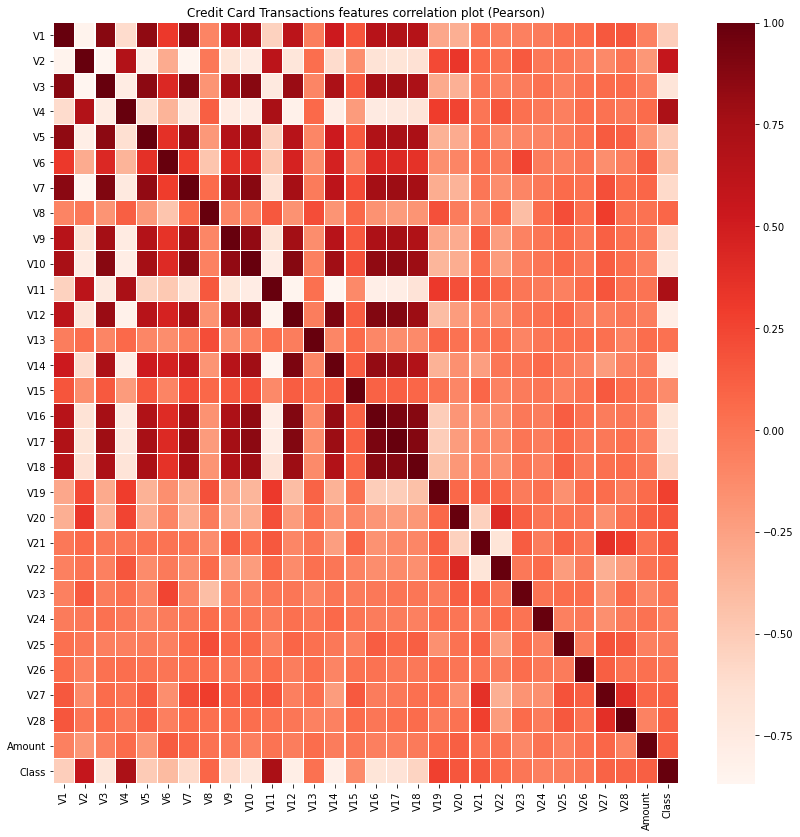

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
#Confusion Matrix
#defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy score of the Random Forest Tree model is 0.9625668449197861


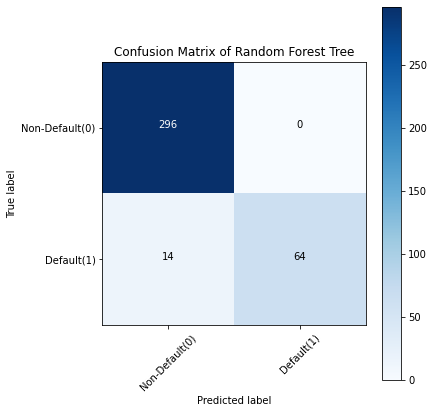

In [ ]:
#Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

In [ ]:
#print the columns
cols=df1.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

#MISSING VALUES TRATEMENT

#MEAN

In [ ]:
#filling the missing values using mean.
df1['Amount'].fillna(df1['Amount'].mean(),inplace=True)
print(df1)

              V1        V2        V3  ...       V28      Amount  Class
0      -1.359807 -0.072781  2.536347  ... -0.021053  149.620000      0
1       1.191857  0.266151  0.166480  ...  0.014724    2.690000      0
2      -1.358354 -1.340163  1.773209  ... -0.059752   80.441161      0
3      -0.966272 -0.185226  1.792993  ...  0.061458  123.500000      0
4      -1.158233  0.877737  1.548718  ...  0.215153   80.441161      0
...          ...       ...       ...  ...       ...         ...    ...
212644 -2.356348  1.746360 -6.374624  ...  0.415703  727.910000      1
213092 -4.666500 -3.952320  0.206094  ...  0.729526   22.470000      1
213116 -3.975939 -1.244939 -3.707414  ...  0.667568    8.300000      1
214662  0.467992  1.100118 -5.607145  ...  0.372098  120.540000      1
214775 -0.395582 -0.751792 -1.984666  ...  0.032113    0.690000      1

[2000 rows x 30 columns]


In [ ]:
#Count & percentage
#Here we are compute the percentage of fraud cases in the overall recorded transactions
cases = len(df1)
nonfraud_count = len(df1[df1.Class == 0])
fraud_count = len(df1[df1.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

Total number of cases are 2000
Number of Non-fraud cases are 1600
Number of fraud cases are 400
Percentage of fraud cases is 25.0


In [ ]:
#Description
#we are going to get a statistical view of both fraud and non-fraud transaction amount data using the ‘describe’ method in python.
nonfraud_cases = df1[df1.Class == 0]
fraud_cases = df1[df1.Class == 1]
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())

NON-FRAUD CASE AMOUNT STATS
count    1600.000000
mean       69.619882
std       151.816600
min         0.000000
25%         6.222500
50%        22.000000
75%        80.441161
max      2452.030000
Name: Amount, dtype: float64
FRAUD CASE AMOUNT STATS
count     400.000000
mean      123.726278
std       256.890297
min         0.000000
25%         1.000000
50%        15.470000
75%       105.915000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#DATA SPLIT
#we are going to define the independent (X) and the dependent variables (Y)
#Using the defined variables, we will split the data into a training set and testing set
#We can split the data easily using the ‘train_test_split’ algorithm
X = df1.drop('Class', axis = 1).values
y = df1['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(('X_train samples : '), X_train[:1])
print(('X_test samples : '), X_test[0:1])
print(('y_train samples : '), y_train[0:10])
print(('y_test samples : '), y_test[0:10])

X_train samples :  [[-8.50529095e-01  9.63376439e-01  1.65445291e+00 -5.92041267e-01
   5.34175225e-01 -1.38949774e-01  9.39026909e-01 -9.64052760e-02
  -2.46999586e-01 -9.43910193e-01 -1.44869841e+00  4.42161300e-01
   1.04769453e+00 -5.29840329e-01 -9.14963304e-01  9.89487630e-02
  -6.05293696e-01 -5.02668144e-01 -8.68566340e-02 -4.83796120e-02
  -2.10380992e-01 -5.16509859e-01 -4.00127241e-01 -4.06340102e-01
   6.21243758e-01  2.01346627e-01 -1.35414591e-01  4.63196660e-02
   8.04411610e+01]]
X_test samples :  [[ 1.25218925e+00 -1.26779100e-01  2.80285135e-01  5.79415530e-01
  -3.74124541e-01 -2.15216606e-01 -1.93078227e-01  1.10756670e-02
   7.70448146e-01 -1.97201332e-01 -1.57776443e+00 -3.77882317e-01
  -9.89381800e-01  5.25916170e-02  5.53251790e-02  1.18796031e-01
  -2.29318028e-01 -3.36749759e-01  5.72051216e-01 -1.22254803e-01
  -3.60295914e-01 -9.59572559e-01 -2.38373980e-02 -4.62200767e-01
   3.81732376e-01  3.40517502e-01 -3.49292310e-02  7.52488200e-03
   8.04411610e+01]]

In [ ]:
#Confusion Matrix
#defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy score of the Decision Tree model is 0.9775


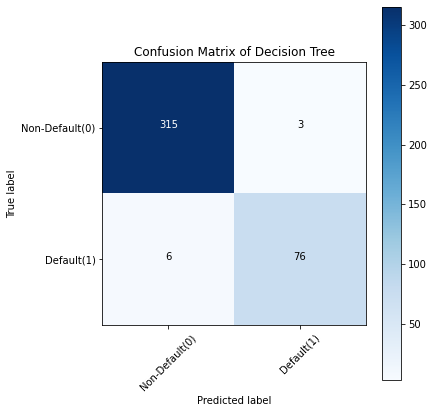

In [ ]:
#MODELING
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

Accuracy score of the KNN model is 0.95


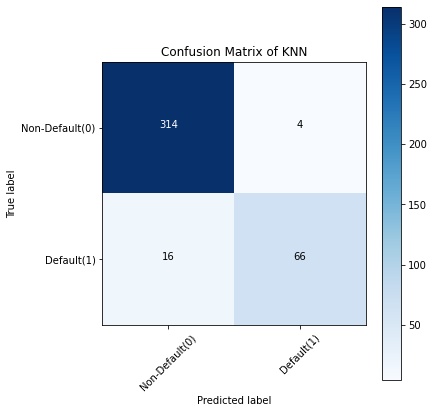

In [ ]:
#K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
plt.rcParams['figure.figsize'] = (6, 6)
#figure
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score of the Logistic Regression model is 0.97


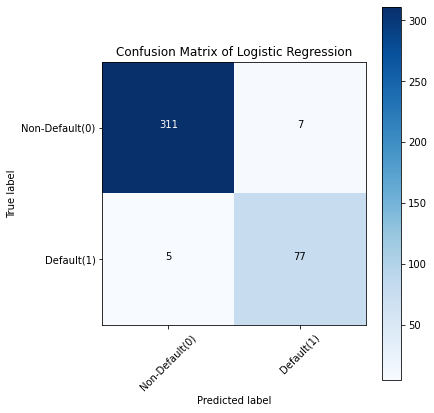

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
plt.rcParams['figure.figsize'] = (6, 6)
#figure
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

Accuracy score of the SVM model is 0.9225


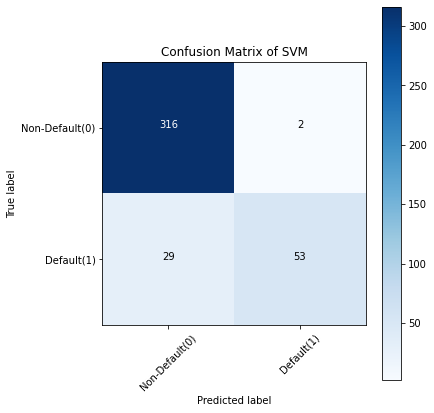

In [ ]:
#SVM 
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
plt.rcParams['figure.figsize'] = (6, 6)
#figure
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

Accuracy score of the Random Forest Tree model is 0.98


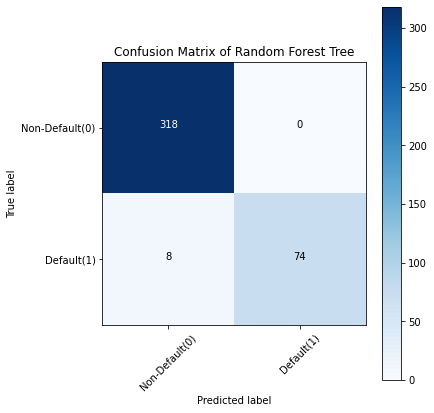

In [ ]:
#Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

Accuracy score of the XGBoost model is 0.98


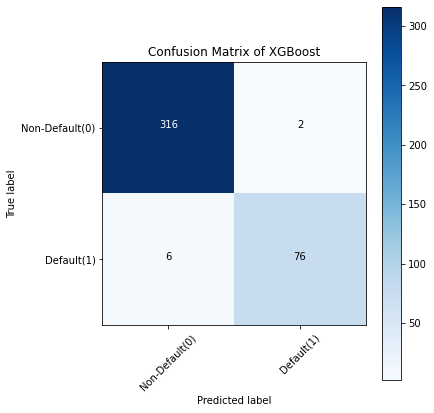

In [ ]:
#XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost
plt.rcParams['figure.figsize'] = (6, 6)
#figure
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

#MEDIAN

In [ ]:
#filling missing values using median
df1['Amount'].fillna(df1['Amount'].median(),inplace=True)
print(df1)

              V1        V2        V3  ...       V28  Amount  Class
0      -1.359807 -0.072781  2.536347  ... -0.021053  149.62      0
1       1.191857  0.266151  0.166480  ...  0.014724    2.69      0
2      -1.358354 -1.340163  1.773209  ... -0.059752   17.28      0
3      -0.966272 -0.185226  1.792993  ...  0.061458  123.50      0
4      -1.158233  0.877737  1.548718  ...  0.215153   17.28      0
...          ...       ...       ...  ...       ...     ...    ...
212644 -2.356348  1.746360 -6.374624  ...  0.415703  727.91      1
213092 -4.666500 -3.952320  0.206094  ...  0.729526   22.47      1
213116 -3.975939 -1.244939 -3.707414  ...  0.667568    8.30      1
214662  0.467992  1.100118 -5.607145  ...  0.372098  120.54      1
214775 -0.395582 -0.751792 -1.984666  ...  0.032113    0.69      1

[2000 rows x 30 columns]


In [ ]:
#Count & percentage
cases = len(df1)
nonfraud_count = len(df1[df1.Class == 0])
fraud_count = len(df1[df1.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

Total number of cases are 2000
Number of Non-fraud cases are 1600
Number of fraud cases are 400
Percentage of fraud cases is 25.0


In [ ]:
#Description
nonfraud_cases = df1[df1.Class == 0]
fraud_cases = df1[df1.Class == 1]
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())

NON-FRAUD CASE AMOUNT STATS
count    1600.000000
mean       64.488037
std       152.430732
min         0.000000
25%         6.222500
50%        17.280000
75%        60.985000
max      2452.030000
Name: Amount, dtype: float64
FRAUD CASE AMOUNT STATS
count     400.000000
mean      123.568375
std       256.936378
min         0.000000
25%         1.000000
50%        15.470000
75%       105.915000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#DATA SPLIT
X = df1.drop('Class', axis = 1).values
y = df1['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(('X_train samples : '), X_train[:1])
print(('X_test samples : '), X_test[0:1])
print(('y_train samples : '), y_train[0:10])
print(('y_test samples : '), y_test[0:10])

X_train samples :  [[-0.85052909  0.96337644  1.65445291 -0.59204127  0.53417523 -0.13894977
   0.93902691 -0.09640528 -0.24699959 -0.94391019 -1.44869841  0.4421613
   1.04769453 -0.52984033 -0.9149633   0.09894876 -0.6052937  -0.50266814
  -0.08685663 -0.04837961 -0.21038099 -0.51650986 -0.40012724 -0.4063401
   0.62124376  0.20134663 -0.13541459  0.04631967 17.28      ]]
X_test samples :  [[ 1.25218925e+00 -1.26779100e-01  2.80285135e-01  5.79415530e-01
  -3.74124541e-01 -2.15216606e-01 -1.93078227e-01  1.10756670e-02
   7.70448146e-01 -1.97201332e-01 -1.57776443e+00 -3.77882317e-01
  -9.89381800e-01  5.25916170e-02  5.53251790e-02  1.18796031e-01
  -2.29318028e-01 -3.36749759e-01  5.72051216e-01 -1.22254803e-01
  -3.60295914e-01 -9.59572559e-01 -2.38373980e-02 -4.62200767e-01
   3.81732376e-01  3.40517502e-01 -3.49292310e-02  7.52488200e-03
   1.72800000e+01]]
y_train samples :  [0 0 1 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 1 0 0 0 1 0]


In [ ]:
#Confusion Matrix
#defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy score of the Decision Tree model is 0.97


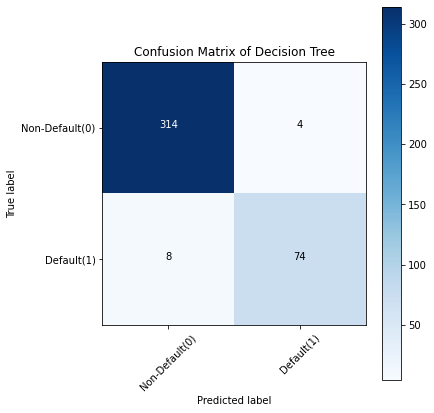

In [ ]:
#MODELING
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

Accuracy score of the KNN model is 0.9525


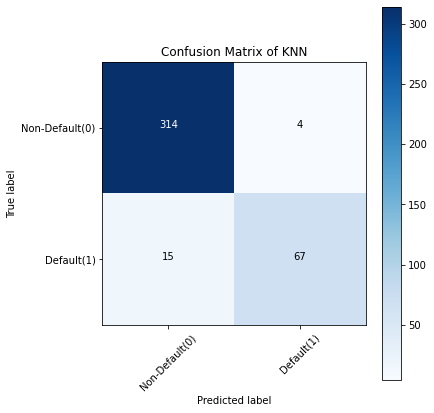

In [ ]:
#K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
plt.rcParams['figure.figsize'] = (6, 6)
#figure
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score of the Logistic Regression model is 0.97


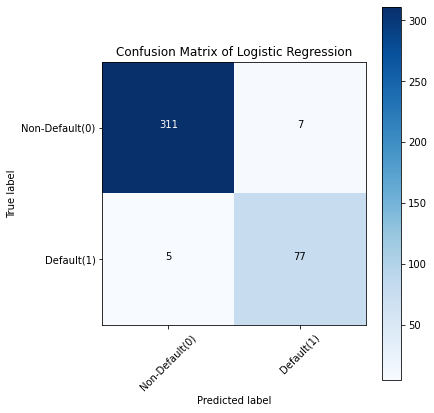

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
plt.rcParams['figure.figsize'] = (6, 6)
#figure
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

Accuracy score of the SVM model is 0.9225


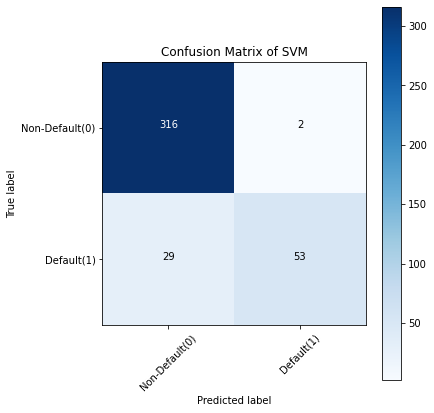

In [ ]:
#SVM 
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
plt.rcParams['figure.figsize'] = (6, 6)
#figure
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

Accuracy score of the Random Forest Tree model is 0.98


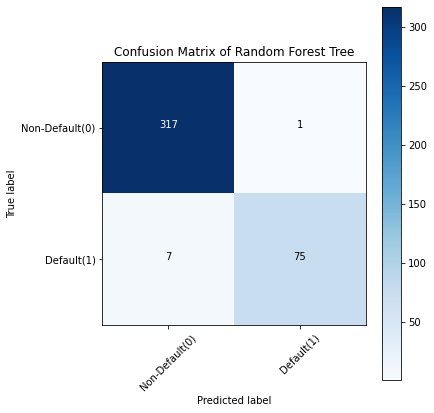

In [ ]:
#Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

Accuracy score of the XGBoost model is 0.9825


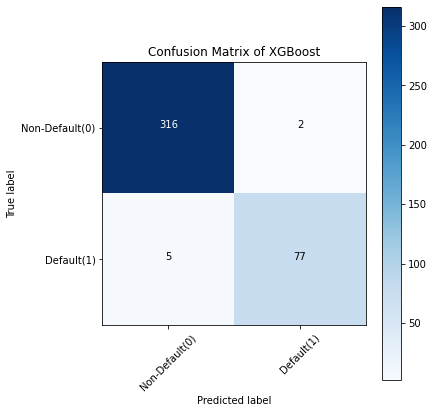

In [ ]:
#XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost
plt.rcParams['figure.figsize'] = (6, 6)
#figure
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

#KNN IMPUTATION

In [ ]:
#filling missing values using KNN imputation

imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(df1)
df1=pd.DataFrame(data=imputer.fit_transform(df1), columns=cols)
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,144.014,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,35.514,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,-6.564659,2.450752,-5.694074,-1.155469,-7.132151,-0.059628,-4.596577,-5.522088,-3.529066,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.910,1.0
1996,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,4.031435,0.983647,-0.578914,-0.199814,-0.729707,1.266713,-0.842769,-0.102946,-0.597597,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.470,1.0
1997,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,4.182162,-4.563675,1.182503,-6.964972,1.115340,-4.997332,-6.419539,-1.183593,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.300,1.0
1998,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,-5.416037,4.497929,-5.019610,-1.019691,-7.914989,0.669648,-4.472014,-5.856998,-2.243178,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.540,1.0


In [ ]:
#Count & percentage
cases = len(df1)
nonfraud_count = len(df1[df1.Class == 0])
fraud_count = len(df1[df1.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

Total number of cases are 2000
Number of Non-fraud cases are 1600
Number of fraud cases are 400
Percentage of fraud cases is 25.0


In [ ]:
#Description
nonfraud_cases = df1[df1.Class == 0]
fraud_cases = df1[df1.Class == 1]
print('NON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases.Amount.describe())
print('FRAUD CASE AMOUNT STATS')
print(fraud_cases.Amount.describe())

NON-FRAUD CASE AMOUNT STATS
count    1600.000000
mean       67.006065
std       157.314585
min         0.000000
25%         5.420000
50%        17.990000
75%        66.307500
max      2452.030000
Name: Amount, dtype: float64
FRAUD CASE AMOUNT STATS
count     400.000000
mean      123.671560
std       256.901871
min         0.000000
25%         1.000000
50%        15.470000
75%       105.915000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
#DATA SPLIT
X = df1.drop('Class', axis = 1).values
y = df1['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(('X_train samples : '), X_train[:1])
print(('X_test samples : '), X_test[0:1])
print(('y_train samples : '), y_train[0:10])
print(('y_test samples : '), y_test[0:10])

X_train samples :  [[-8.50529095e-01  9.63376439e-01  1.65445291e+00 -5.92041267e-01
   5.34175225e-01 -1.38949774e-01  9.39026909e-01 -9.64052760e-02
  -2.46999586e-01 -9.43910193e-01 -1.44869841e+00  4.42161300e-01
   1.04769453e+00 -5.29840329e-01 -9.14963304e-01  9.89487630e-02
  -6.05293696e-01 -5.02668144e-01 -8.68566340e-02 -4.83796120e-02
  -2.10380992e-01 -5.16509859e-01 -4.00127241e-01 -4.06340102e-01
   6.21243758e-01  2.01346627e-01 -1.35414591e-01  4.63196660e-02
   8.29420000e+01]]
X_test samples :  [[ 1.25218925e+00 -1.26779100e-01  2.80285135e-01  5.79415530e-01
  -3.74124541e-01 -2.15216606e-01 -1.93078227e-01  1.10756670e-02
   7.70448146e-01 -1.97201332e-01 -1.57776443e+00 -3.77882317e-01
  -9.89381800e-01  5.25916170e-02  5.53251790e-02  1.18796031e-01
  -2.29318028e-01 -3.36749759e-01  5.72051216e-01 -1.22254803e-01
  -3.60295914e-01 -9.59572559e-01 -2.38373980e-02 -4.62200767e-01
   3.81732376e-01  3.40517502e-01 -3.49292310e-02  7.52488200e-03
   1.11100000e+02]]

In [ ]:
#Confusion Matrix
#defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy score of the Decision Tree model is 0.975


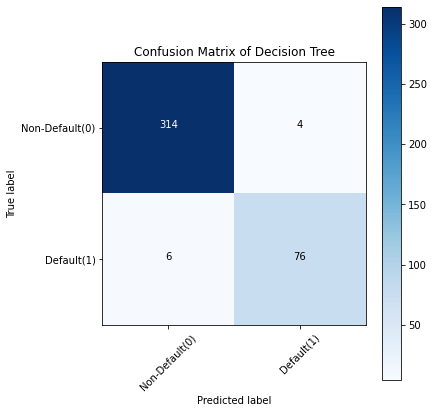

In [ ]:
#MODELING
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

Accuracy score of the KNN model is 0.95


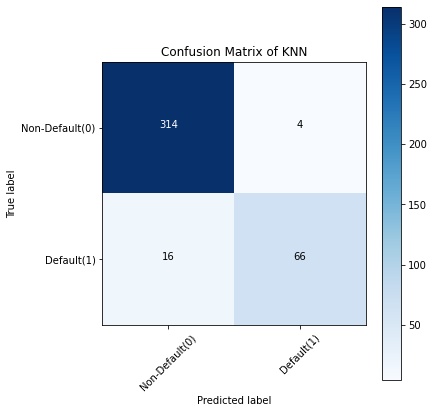

In [ ]:
#K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
plt.rcParams['figure.figsize'] = (6, 6)
#figure
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score of the Logistic Regression model is 0.97


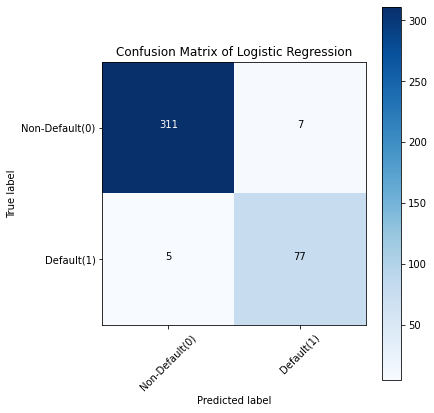

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
plt.rcParams['figure.figsize'] = (6, 6)
#figure
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

Accuracy score of the SVM model is 0.92


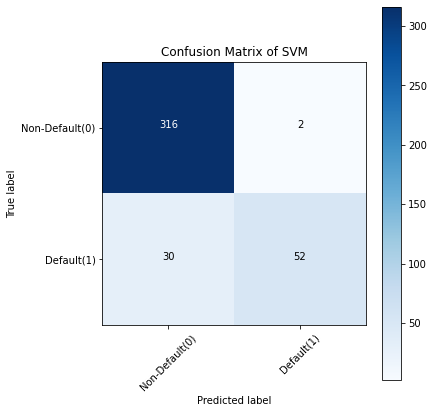

In [ ]:
#SVM 
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)))
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
plt.rcParams['figure.figsize'] = (6, 6)
#figure
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

Accuracy score of the Random Forest Tree model is 0.9825


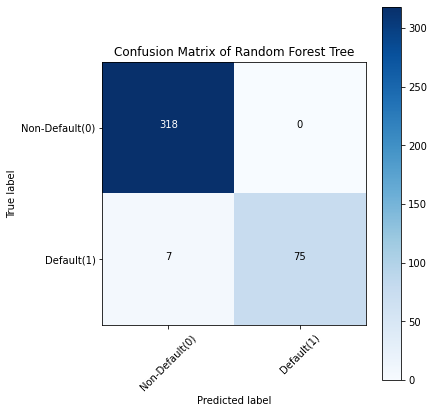

In [ ]:
#Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
print('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)))
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
plt.rcParams['figure.figsize'] = (6, 6)
#figure
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

Accuracy score of the XGBoost model is 0.9825


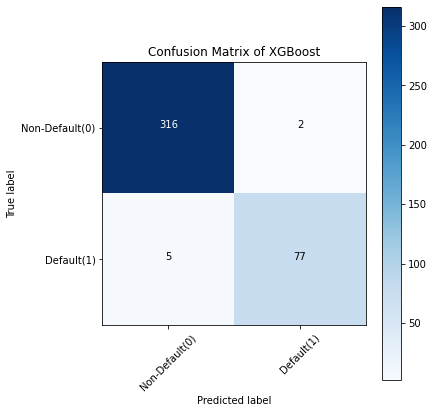

In [ ]:
#XGBoost
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost
plt.rcParams['figure.figsize'] = (6, 6)
#figure
xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()